#**DESAFÍO - OBTENCIÓN DE INSIGHTS**
> Nombre del Dataset: Dataset-Telco-Customer-Churn.csv



##Instalación y carga de librerías a utilizar 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import scipy 
from scipy import stats
from scipy.stats import skew, kurtosis

##Carga del dataset en formato .csv






In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive') 
%cd '/content/gdrive/MyDrive/ProyectoDataScience/'
df_churn = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')
df_Original = pd.read_csv('Dataset-Telco-Customer-Churn.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1JBjZRPlZTm-Ax9WZx4quXsWlJqPbkKqm/ProyectoDataScience


##Mostar el Dataset Preliminar (Sin transformaciones)



In [ ]:
print('---------- HEAD ---------- ')
display(df_churn.head())
print('---------- DESCRIBE ---------- ')
display(df_churn.describe(include="all").T)
print('---------- SHAPE ---------- ')
display(df_churn.shape)
print('---------- INFO ---------- ')
display(df_churn.info())

---------- HEAD ---------- 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


---------- DESCRIBE ---------- 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------- SHAPE ---------- 


(7043, 21)

---------- INFO ---------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

None

Este dataset incluye un total de 7,043 registros.


##Analisis resumido de las variables (Valores distintos)

In [ ]:
for variable in df_churn.columns:
    print(variable)
    print(df_churn[variable].unique(),"\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender
['Female' 'Male'] 

SeniorCitizen
[0 1] 

Partner
['Yes' 'No'] 

Dependents
['No' 'Yes'] 

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService
['No' 'Yes'] 

MultipleLines
['No phone service' 'No' 'Yes'] 

InternetService
['DSL' 'Fiber optic' 'No'] 

OnlineSecurity
['No' 'Yes' 'No internet service'] 

OnlineBackup
['Yes' 'No' 'No internet service'] 

DeviceProtection
['No' 'Yes' 'No internet service'] 

TechSupport
['No' 'Yes' 'No internet service'] 

StreamingTV
['No' 'Yes' 'No internet service'] 

StreamingMovies
['No' 'Yes' 'No internet service'] 

Contract
['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling
['Yes' 'No'] 

PaymentMethod
['Electronic check' 'Mailed check' 'Bank tran

##Contar valores NA por columna

In [ ]:
print(df_churn.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


##Eliminación de la columna del Id de cliente que no es relevante a estudio 

In [ ]:
df_churn.drop("customerID", axis=1, inplace=True)

##Casteo de los datos
> Cambio de los tipos de datos y valores a booleanos para poder analizarlos

In [ ]:
df_churn.gender = [1 if x == "Male" else 0 for x in df_churn.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    df_churn[col] = [1 if x == "Yes" else 0 for x in df_churn[col]]        
df_churn.head(10)  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


## Agrupación y ordenamiento de columnas




In [ ]:
print(df_churn['gender'].groupby(df_churn['Churn']).sum())
print(df_churn['SeniorCitizen'].groupby(df_churn['Churn']).sum())
print(df_churn['Partner'].groupby(df_churn['Churn']).sum())

print(df_churn['tenure'].groupby(df_churn['Churn']).sum())

print(df_churn['Churn'].groupby(df_churn['InternetService']).sum())
print(df_churn['Churn'].groupby(df_churn['Contract']).sum())
print(df_churn['Churn'].groupby(df_churn['PaymentMethod']).sum())

Churn
0    2625
1     930
Name: gender, dtype: int64
Churn
0    666
1    476
Name: SeniorCitizen, dtype: int64
Churn
0    2733
1     669
Name: Partner, dtype: int64
Churn
0    194387
1     33603
Name: tenure, dtype: int64
InternetService
DSL             459
Fiber optic    1297
No              113
Name: Churn, dtype: int64
Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64
PaymentMethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: Churn, dtype: int64


In [ ]:
df_churn.sort_values('TotalCharges',ascending=False)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,0,0,0,0,11,1,0,Fiber optic,0,1,1,1,0,1,Month-to-month,1,Electronic check,94.20,999.9,0
3353,1,0,1,0,12,1,0,Fiber optic,0,1,0,0,0,1,Month-to-month,1,Credit card (automatic),85.05,999.8,0
3686,0,0,0,0,13,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,75.00,999.45,1
5598,0,0,1,1,55,1,0,No,0,0,0,0,0,0,One year,0,Credit card (automatic),19.15,998.1,0
6646,1,0,1,1,51,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,19.40,997.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,0,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,,0
753,1,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,,0
1340,0,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,,0
4380,0,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,,0


In [ ]:
df_churn.sort_values('MonthlyCharges',ascending=False)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,0,0,1,1,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,1,Bank transfer (automatic),118.75,8672.45,0
2115,0,0,0,0,71,1,1,Fiber optic,1,1,1,1,1,1,Two year,1,Electronic check,118.65,8477.6,0
3894,0,0,1,0,68,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Mailed check,118.60,7990.05,0
4804,0,0,0,0,61,1,1,Fiber optic,1,1,1,1,1,1,One year,1,Electronic check,118.60,7365.7,0
5127,1,0,0,0,67,1,1,Fiber optic,1,1,1,1,1,1,One year,1,Bank transfer (automatic),118.35,7804.15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,0,0,1,1,25,1,0,No,0,0,0,0,0,0,Two year,1,Mailed check,18.70,383.65,0
1156,0,0,0,0,53,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,18.70,1005.7,0
6652,1,0,0,0,36,1,0,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),18.55,689,0
1529,0,0,1,0,59,1,0,No,0,0,0,0,0,0,Two year,0,Bank transfer (automatic),18.40,1057.85,0


##Busqueda y Eliminación de duplicados 

In [ ]:
print(df_churn.shape)
df_churn = df_churn.drop_duplicates()
print(df_churn.shape)
#display(df_churn.head())

(7043, 20)
(7021, 20)


##Comparar Dataset resultado con el Dataset original

In [ ]:
print(df_churn.shape)
display(df_churn.head())
print(df_Original.shape)
display(df_Original.head())
#Reiniciar df_churn
df_churn = df_Original

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##Detección de outliers

In [ ]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

In [ ]:
# Create a new DataFrame with only numeric columns
numeric_data = df_churn.select_dtypes(include=np.number)
display(numeric_data.info())
display(numeric_data.head())
numeric_data['TotalCharges'] = pd.to_numeric(numeric_data['TotalCharges'],errors = 'coerce') # Convertir TotalCharges a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


None

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


#EDA

##Tasa de abandono de clientes 

------------------ GENDER ------------------
Male      3555
Female    3488
Name: gender, dtype: int64


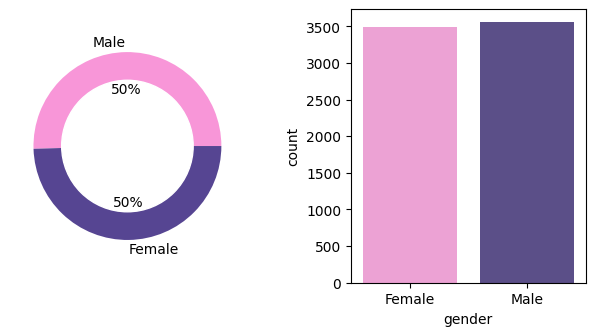

In [ ]:
 Col_Analizar = "gender"
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()

Se seleccionó un grafico de tarta, ya que solo hay 2 clases y se representa más claramente la magnitud de cada uno.
>Se evidenció que casi 1/4 de los clientes ha abandonado de contrato.

##Distribución de la permanencia en el contrato



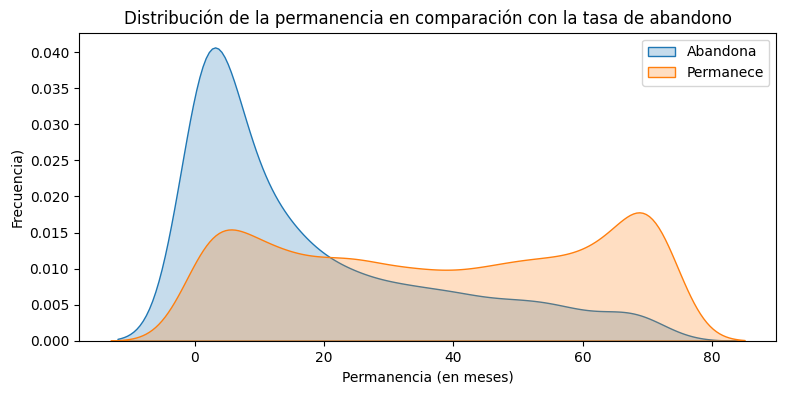

In [ ]:
plt.figure(figsize = (9,4))
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "Yes") ], shade = True)
g = sns.kdeplot(df_churn.tenure[(df_churn["Churn"] == "No") ], shade= True)
g.set_xlabel("Permanencia (en meses)")
g.set_ylabel("Frecuencia)")
plt.title('Distribución de la permanencia en comparación con la tasa de abandono')
g = g.legend(["Abandona","Permanece"])

> Según la informacion la mayoría de los clientes que abandonaron estuvieron  en la empresa menos de 20 meses, a medida que aumenta la permanencia la probabilidad de abandonar disminuye.

##Incidencia de los cargos (Mensuales y Totales) en la tasa de abandono 

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64 

Churn
Yes    1531.796094
No     2555.344141
Name: TotalCharges, dtype: float64 



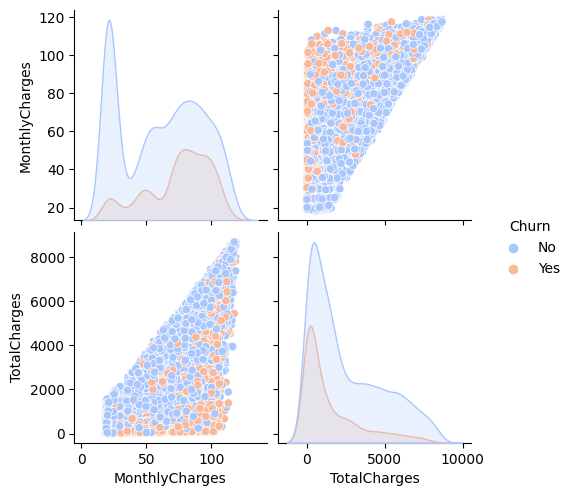

In [ ]:
print(df_churn.groupby(by=['Churn'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df_churn.groupby(by=['Churn'])['TotalCharges'].mean().sort_values(), '\n')

datos_1 = ['MonthlyCharges','TotalCharges', 'Churn']
sns.pairplot(df_churn[datos_1], hue = 'Churn', palette='coolwarm')

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
Skew:  0.2394887299846216
Kurtosis:  1.6127613089675723
IQR:  46.0


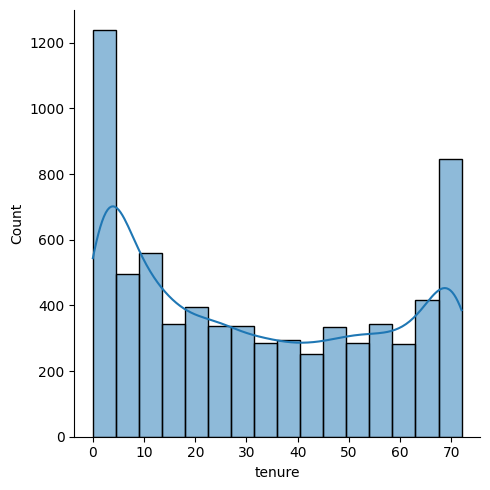

In [ ]:
Col_Analizar = 'tenure'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)

0    1.277445
1    0.066327
2    1.236724
3    0.514251
4    1.236724
5    0.992402
6    0.422317
7    0.910961
Name: tenure, dtype: float64

count    7043.000000
mean        0.890680
std         0.454663
min         0.015113
25%         0.514251
50%         0.951682
75%         1.277445
max         1.613701
Name: tenure, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

<Axes: >

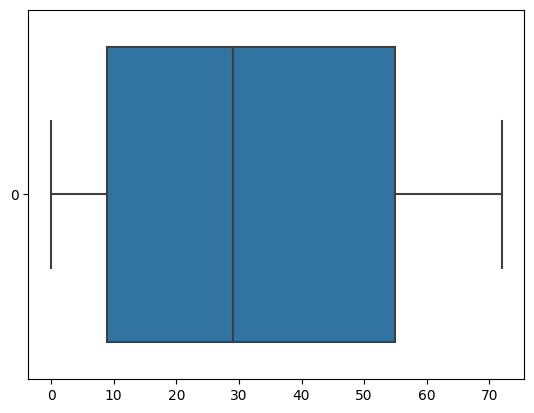

In [ ]:
#Cálculo de ZScore 
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [ ]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7043, minmax=(0, 72), mean=32.37114865824223, variance=603.1681081237369, skewness=0.2394887299846216, kurtosis=-1.3872386910324277)
Media geometrica:  0.0
Media armonica:  0.0
Media recortada:  31.427861579414376
Moda:  ModeResult(mode=array([1]), count=array([613]))
Coeficiente de variacion:  0.7586303990053388
IQR:  46.0


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64
Skew:  -0.2204774644391769
Kurtosis:  1.7427808990618143
IQR:  54.349999999999994


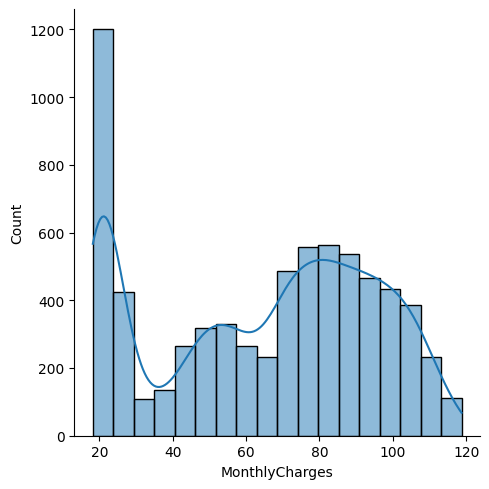

In [ ]:
Col_Analizar = 'MonthlyCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    1.160323
1    0.259629
2    0.362660
3    0.746535
4    0.197365
5    1.159546
6    0.808907
7    1.163647
Name: MonthlyCharges, dtype: float64

count    7043.000000
mean        0.871516
std         0.490402
min         0.000389
25%         0.459045
50%         0.847128
75%         1.343121
max         1.794352
Name: MonthlyCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

<Axes: >

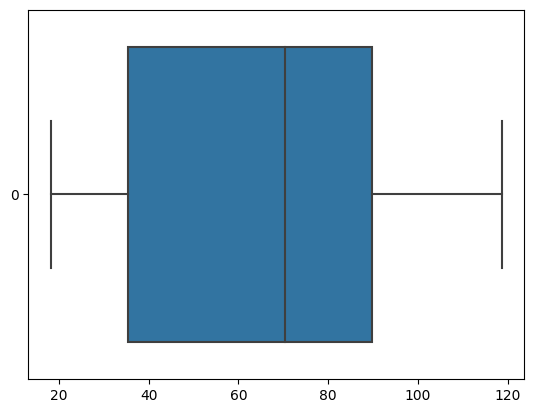

In [ ]:
#Cálculo de ZScore 
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [ ]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR

DescribeResult(nobs=7043, minmax=(18.25, 118.75), mean=64.76169246059918, variance=905.4109343405098, skewness=-0.2204774644391769, kurtosis=-1.2572191009381857)
Media geometrica:  55.80800547479952
Media armonica:  45.94095260462972
Media recortada:  64.96565217391304
Moda:  ModeResult(mode=array([20.05]), count=array([61]))
Coeficiente de variacion:  0.4645942641669282
IQR:  54.349999999999994


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64
Skew:  0.9614373590490068
Kurtosis:  2.767512902413449
IQR:  3393.2875000000004


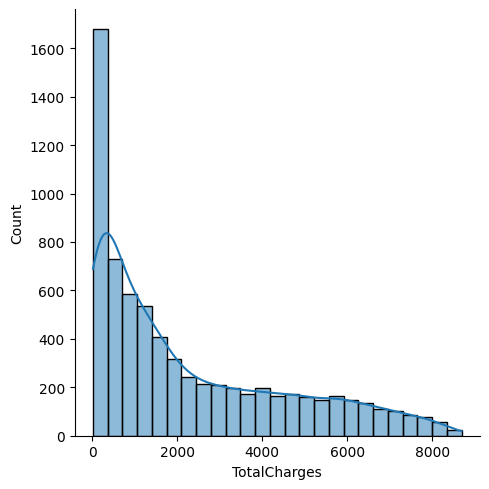

In [ ]:
Col_Analizar = 'TotalCharges'  #<- Variable a analizar
column = numeric_data[Col_Analizar]
column = numeric_data[Col_Analizar].dropna()
sns.displot(column, kde=True)
print(column.describe())
print('Skew: ', skew(column))
print('Kurtosis: ', kurtosis(column, fisher = False))
iqr = column.quantile(.75) - column.quantile(.25)
print('IQR: ', iqr)
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)

0    0.994194
1    0.173740
2    0.959649
3    0.195248
4    0.940457
5    0.645369
6    0.147313
7    0.874169
Name: TotalCharges, dtype: float64

count    7.032000e+03
mean     8.380003e-01
std      5.457086e-01
min      1.944939e-07
25%      4.613058e-01
50%      8.001817e-01
75%      9.852380e-01
max      2.824261e+00
Name: TotalCharges, dtype: float64

************Z - S C O R E    MODIFICADO ****************


count    6638.000000
mean     1971.633361
std      1922.302537
min        18.800000
25%       356.737500
50%      1268.975000
75%      3235.725000
max      6812.950000
Name: TotalCharges, dtype: float64

<Axes: >

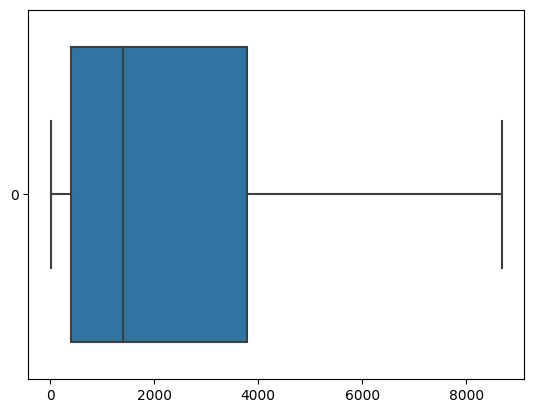

In [ ]:
#Cálculo de ZScore 
z_scores = np.abs(stats.zscore(column))
display(z_scores.head(8))
display(z_scores.describe())
print('************Z - S C O R E    MODIFICADO ****************')
columnzscore = column[(z_scores < 2)] #puede ser 2, si considero el 95%, puede ser 3 si quiero el 99.5%
display(columnzscore.describe())
sns.boxplot(column, orient='h')

In [ ]:
#Análisis univariado
print( scipy.stats.describe(column))
print('Media geometrica: ', scipy.stats.gmean(column))
print('Media armonica: ', scipy.stats.hmean(column))
print('Media recortada: ', scipy.stats.trim_mean(column,0.1)) #No usen .05 Media recortada (Proporcion removida en cada cola 10%)
print('Moda: ', scipy.stats.mode(column))
print('Coeficiente de variacion: ', scipy.stats.variation(column)) # Calcular el coeficiente de variacion
print('IQR: ', scipy.stats.iqr(column))# Calcular el IQR
#scipy.stats.skew(column)
#scipy.stats.kurtosis(column)


DescribeResult(nobs=7032, minmax=(18.8, 8684.8), mean=2283.300440841866, variance=5138252.407053568, skewness=0.9614373590490068, kurtosis=-0.23248709758655117)
Media geometrica:  1032.233362322447
Media armonica:  252.88978229811875
Media recortada:  1970.1402417348027
Moda:  ModeResult(mode=array([20.2]), count=array([11]))
Coeficiente de variacion:  0.9926902917247381
IQR:  3393.2875000000004


###Resumen del comportamiento de las variables numericas

En general se observó que todas las variables numéricas del dataset  no tienen una distribución normal, por los que procederemos a calcular las desviaciones estandar, y la asimetría de los mismos. 

* "tenure" : 
  * La variable tenure indica el número de meses que un cliente ha estado suscrito al servicio. El valor mínimo es 0 (lo que indica que el cliente acaba de suscribirse) y el valor máximo es 72. La media es de 32,37 meses y la mediana es de 29 meses.
  * La mayoría de los clientes abandonan después de un tiempo relativamente corto.Existe un problema con la retención de clientes a largo plazo en la empresa.
  * Hay una gran variación en la duración de la membresía de los clientes que abandonan lo  podría indicar que hay diferentes factores que contribuyen al abandono, y que es necesario analizarlo con respecto a otras variables. 
  *  En general tiene una distribución aproximadamente simétrica, con un sesgo cercano a cero y una curtosis cercana a la normalidad. Esto indica que la mayoría de los clientes tienen una duración de contrato similar, con algunas diferencias en los extremos. <br>
  * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=603.1681081237369 <br>
skewness=0.2394887299846216<br>kurtosis=-1.3872386910324277<br>
Coeficiente de variacion:  0.7586303990053388<br>
IQR:  46.0<br><br>

* "MonthlyCharges" : <br>
  * Los cargos mensuales indican que la mayoría de los clientes que abandonan tienen cargos mensuales bajos, y que los cargos más altos tienen una menor tasa, disminuyendo el abandono a partir del 3er quartil.
  * El sesgo y la curtosis de esta variable se se comporta de manera similar a la variable Tenure, lo que indica que la mayoría de los clientes tienen cargos mensuales similares, pero algunos clientes tienen cargos mensuales significativamente mas cerca de los extremos.
  * En general, se observa una tendencia de que los clientes que pagan menos  por el servicio tienen más probabilidades de cancelar. se observó que el 24.4% de los clientes que pagan más de 70 por mes cancelaron segun el boxplot. 

 * RESUMEN NUMÉRICO<br>
mean       64.761692<br>
std        30.090047<br>
min        18.250000<br>
25%        35.500000<br>
50%        70.350000<br>
75%        89.850000<br>
max       118.750000<br>
variance=905.4109343405098<br>
Skewness=-0.2204774644391769<br>
kurtosis=-1.2572191009381857)<br>
Coeficiente de variacion:  0.4645942641669282<br>
IQR:  54.35<br><br>

* "TotalCharges" : <br>
  * Segun la distribución de los cargos totales de los clientes que abandonan,se puede determinar que la mayoría de ellos tienen cargos totales relativamente bajos y que a medida que estos aumentan disminuye la tasa de abandono. observandose un sesgo totalmente a la derecha.

  * La media de la variable TotalCharges es de aproximadamente $2283.30, mientras que la mediana es de 1397.47. La diferencia entre la media y la mediana sugiere que hay valores atípicos en el extremo superior de la distribución.

 * RESUMEN NUMÉRICO<br>
mean     2283.300441<br>
std      2266.771362<br>
min        18.800000<br>
25%       401.450000<br>
50%      1397.475000<br>
75%      3794.737500<br>
max      8684.800000<br>
variance=5138252.407053568<br>
Skewness=0.9614373590490068<br>
kurtosis=-0.23248709758655117)<br>
Coeficiente de variacion:  0.9926902917247381<br>
IQR:  3393.2875000000004<br><br>


En conclusión Las variables numéricas tenure, MonthlyCharges y TotalCharges tienen distribuciones similares a las que se describieron anteriormente. La mayoría de los clientes tienen una duración de contrato similar, cargos mensuales similares y cargos totales similares, pero con algunas diferencias en los extremos lo que sugiere que los clientes que han estado mas antiguos en la compañía y que pagan más mensualmente tienen cargos totales más altos.

##Análisis univariado variables categoricas

------------------ GENDER ------------------
Male      3555
Female    3488
Name: gender, dtype: int64


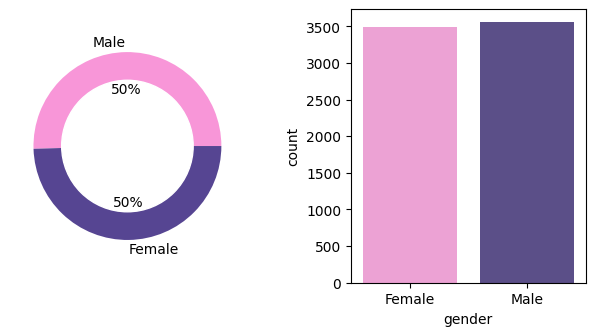

------------------ PARTNER ------------------
No     3641
Yes    3402
Name: Partner, dtype: int64


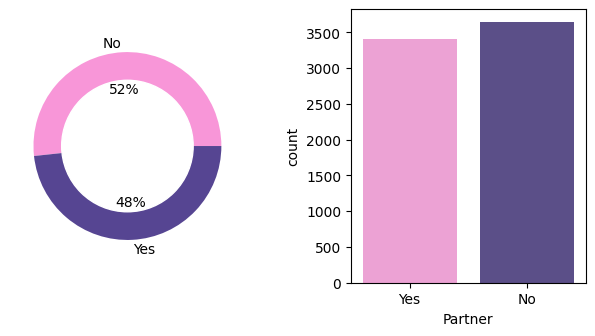

------------------ DEPENDENTS ------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64


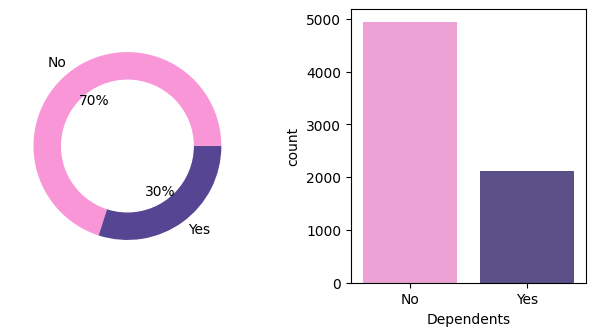

------------------ PHONESERVICE ------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64


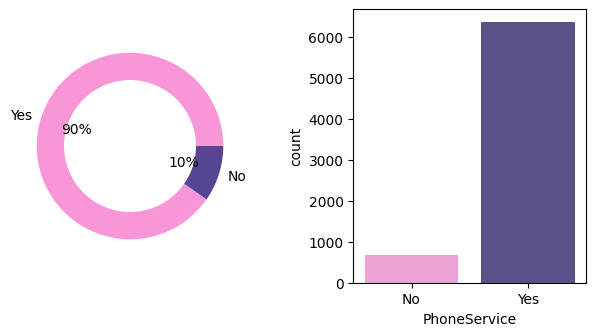

------------------ MULTIPLELINES ------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


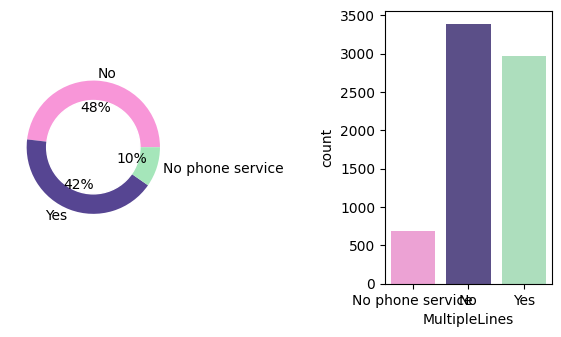

------------------ INTERNETSERVICE ------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


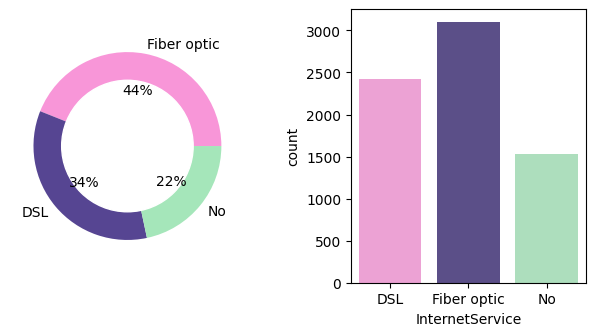

------------------ ONLINESECURITY ------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


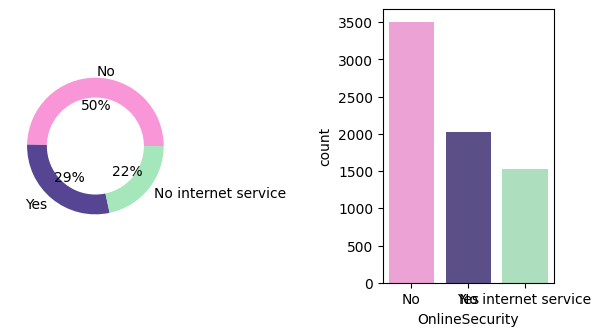

------------------ ONLINEBACKUP ------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


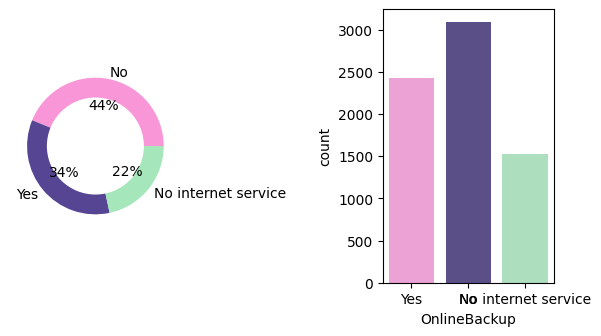

------------------ DEVICEPROTECTION ------------------
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


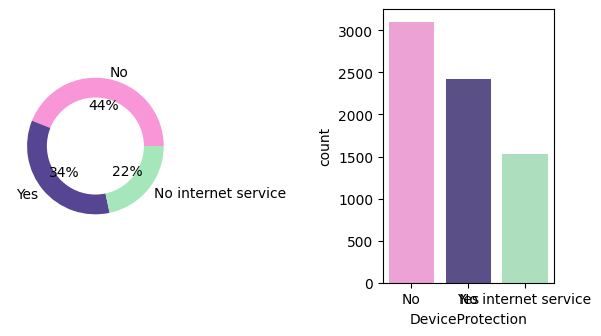

------------------ TECHSUPPORT ------------------
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


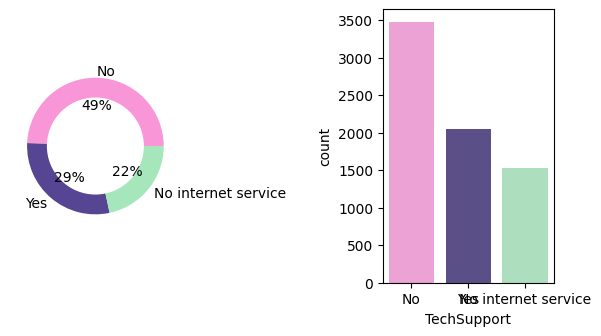

------------------ PAYMENTMETHOD ------------------
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


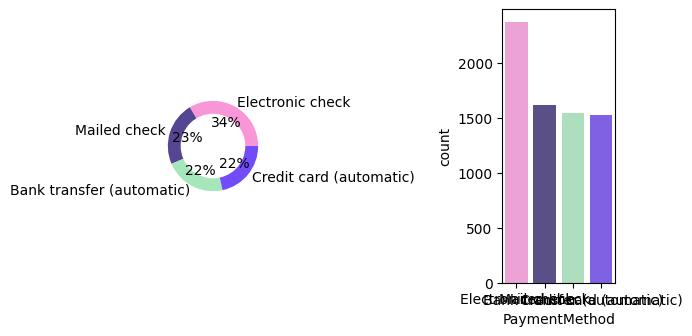

------------------ PAPERLESSBILLING ------------------
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


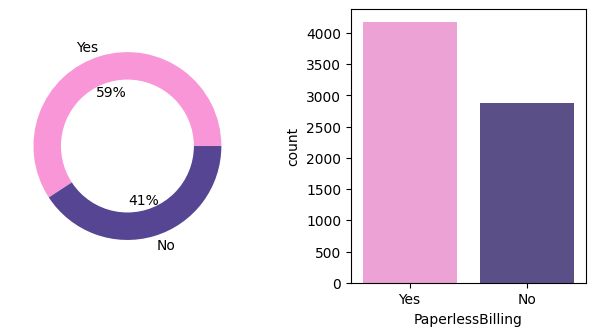

------------------ CONTRACT ------------------
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


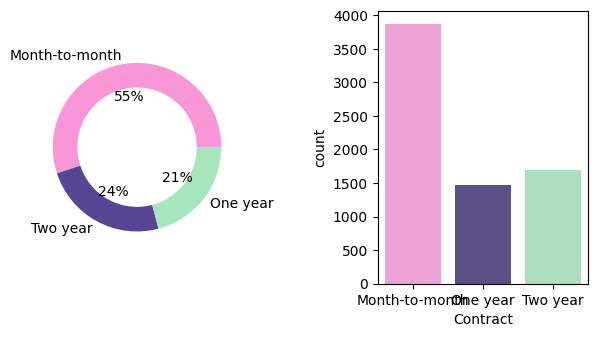

------------------ STREAMINGMOVIES ------------------
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


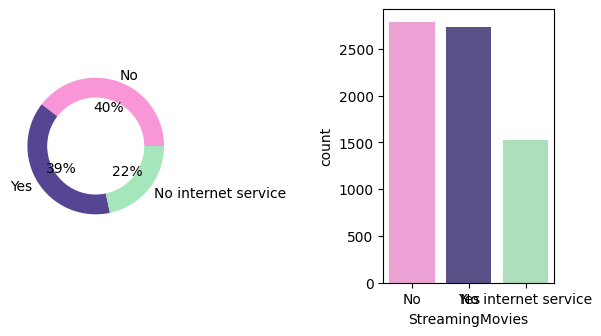

------------------ STREAMINGTV ------------------
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


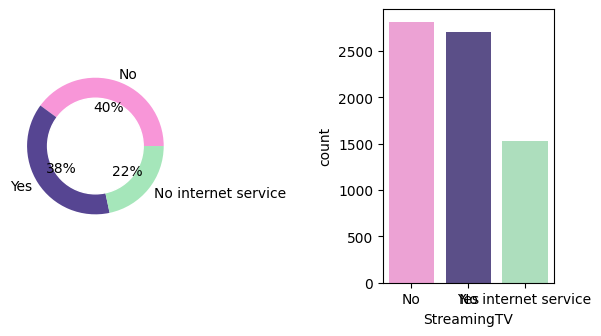

In [ ]:
col_categoricas = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "PaymentMethod", "PaperlessBilling", "Contract", "StreamingMovies", "StreamingTV"]
for i, columna in enumerate(col_categoricas):
 Col_Analizar = columna
 colors = ["#f896d8", "#564592", "#A5E6BA", "#724cf9", "#ca7df9"]
 print(f'\033[1m' + f'------------------ {Col_Analizar.upper()} ------------------' + '\033[0m')
 print(df_churn[Col_Analizar].value_counts())
 plt.figure(figsize=(10, 4))
 plt.subplot(1, 3, 1)
 plt.pie(df_churn[Col_Analizar].value_counts().values.tolist(),
            labels=df_churn[Col_Analizar].value_counts().keys().tolist(),
            colors=colors,
            autopct='%1.0f%%')
 circle = plt.Circle((0, 0), 0.7, color='white')
 p = plt.gcf()
 p.gca().add_artist(circle)

 plt.subplot(1, 3, 2)
 sns.countplot(data=df_churn, x=Col_Analizar, palette=colors)
 plt.tight_layout(pad=3)

 plt.show()


###Resumen del comportamiento de las variables categoricas

* "gender" : Al analizar  la columna genero observamos que estan distribuidas uniformemente.

* "Partner" : con respecto a esta columna observamos que ligeramente es mayor la opcion "No".

* "Dependents" : Para los clientes que tienen dependientes observamos que el 70% no ha abandonado o cancelado contrato.

* "PhoneService" : En su mayoria los clientes que contratan tambien contratan servicio telefonico.

* "MultipleLines" : de los abonados totales la mayoría no tiene multiples lineas.

* "InternetService" : En su mayoria el servicio de internet es por fibra óptica.

* "OnlineSecurity" : La mitad de los clientes no contratan este serivicio.

* "OnlineBackup" : El 44% de los clientes no contrata este servicio.

* "DeviceProtection" : Igual al anterior.

* "TechSupport" : Alrededor de un 30% contrata este servicio.

* "PaymentMethod" : 34% de los clientes prefiere pago electronico

* "PaperlessBilling" : La mayoria prefiere cobro sin papel.

* "Contract" : El contrato mes a mes es el predominante.

* "StreamingMovies" y "StreamingTV" : Al rededor de 6 de cada 10 clientes no contratan servicios de streaming.
